In [1]:
!python --version

Python 2.7.17


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
# import os
# path = '/content/drive/Shared drives/chinh-share/nmt-v4.1-SIF/'
# os.chdir(path)
# import time
# FOLDERNAME = "EnSIF-" + str(time.strftime("%Y%m%d-%H%M"))
# !mkdir $FOLDERNAME

# path = path + FOLDERNAME
# os.chdir(path)
# !pwd

import os
os.chdir("/content/drive/Shared drives/chinh-share/nmt-v4.2-SIF/EnSIF-20210415-0854")
!pwd

/content/drive/Shared drives/chinh-share/nmt-v4.2-SIF/EnSIF-20210415-0854


In [ ]:
!git clone https://github.com/DFKI-Interactive-Machine-Learning/AraSIF.git

fatal: destination path 'AraSIF' already exists and is not an empty directory.


In [5]:
import os
os.chdir("/content/drive/Shared drives/chinh-share/nmt-v4.2-SIF/EnSIF-20210415-0854/AraSIF")
!pwd

/content/drive/Shared drives/chinh-share/nmt-v4.2-SIF/EnSIF-20210415-0854/AraSIF


In [6]:
!pip install -r requirements.txt 
!pip install sklearn
!pip install pickle4

ERROR: Could not find a version that satisfies the requirement pickle (from -r requirements.txt (line 4)) (from versions: none)
ERROR: No matching distribution found for pickle (from -r requirements.txt (line 4))
  Created wheel for pickle4: filename=pickle4-0.0.1-py2.py3-none-any.whl size=19707 sha256=b66056a8fb3b69c8373214821916ae3ff4d41dc49a543f93658ad1776c952e9e
  Stored in directory: /root/.cache/pip/wheels/e4/a7/6a/f6a88d4299cde31eec2f6d30be7b86a5135e10d5e6527ef33a
Successfully built pickle4


In [ ]:
# GLOVE DATASET

In [ ]:
!wget http://downloads.cs.stanford.edu/nlp/data/glove.6B.zip
!unzip glove.6B.zip -d 'models'
!ls -al models/

--2021-04-20 02:42:56--  http://downloads.cs.stanford.edu/nlp/data/glove.6B.zip
Resolving downloads.cs.stanford.edu (downloads.cs.stanford.edu)... 171.64.64.22
Connecting to downloads.cs.stanford.edu (downloads.cs.stanford.edu)|171.64.64.22|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 862182613 (822M) [application/zip]
Saving to: ‘glove.6B.zip’

glove.6B.zip        100%[===================>] 822.24M  5.05MB/s    in 2m 42s  

2021-04-20 02:45:38 (5.08 MB/s) - ‘glove.6B.zip’ saved [862182613/862182613]

Archive:  glove.6B.zip
  inflating: models/glove.6B.50d.txt  
  inflating: models/glove.6B.100d.txt  
  inflating: models/glove.6B.200d.txt  
  inflating: models/glove.6B.300d.txt  
total 2197133
-rw------- 1 root root  347116733 Aug  4  2014 glove.6B.100d.txt
-rw------- 1 root root  693432828 Aug  4  2014 glove.6B.200d.txt
-rw------- 1 root root 1037962819 Aug 27  2014 glove.6B.300d.txt
-rw------- 1 root root  171350079 Aug  4  2014 glove.6B.50d.txt
-rw-------

# Word Weight

In [ ]:
!wget https://dumps.wikimedia.org/enwiki/latest/enwiki-latest-pages-articles10.xml-p4045403p5399366.bz2

--2021-04-15 09:21:23--  https://dumps.wikimedia.org/enwiki/latest/enwiki-latest-pages-articles10.xml-p4045403p5399366.bz2
Resolving dumps.wikimedia.org (dumps.wikimedia.org)... 208.80.154.7, 2620:0:861:1:208:80:154:7
Connecting to dumps.wikimedia.org (dumps.wikimedia.org)|208.80.154.7|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 509971681 (486M) [application/octet-stream]
Saving to: ‘enwiki-latest-pages-articles10.xml-p4045403p5399366.bz2’

enwiki-latest-pages 100%[===================>] 486.35M  4.94MB/s    in 1m 40s  

2021-04-15 09:23:04 (4.87 MB/s) - ‘enwiki-latest-pages-articles10.xml-p4045403p5399366.bz2’ saved [509971681/509971681]



In [ ]:
!git submodule update --init

Submodule 'wikiextractor' (https://github.com/attardi/wikiextractor) registered for path 'wikiextractor'
Cloning into '/content/drive/Shareddrives/chinh-share/nmt-v4.1-SIF/EnSIF-20210415-0854/AraSIF/wikiextractor'...
Submodule path 'wikiextractor': checked out '3162bb6c3c9ebd2d15be507aa11d6fa818a454ac'


In [ ]:
!ls -al wikiextractor

total 1080
-rw------- 1 root root 968029 Apr 15 09:23 categories.filter
-rw------- 1 root root   8547 Apr 15 09:23 cirrus-extract.py
-rw------- 1 root root    782 Apr 15 09:23 extract.sh
-rw------- 1 root root     38 Apr 15 09:23 .git
-rw------- 1 root root   1137 Apr 15 09:23 .gitignore
-rw------- 1 root root   6518 Apr 15 09:23 README.md
-rw------- 1 root root 119222 Apr 15 09:23 WikiExtractor.py


In [ ]:
! cd wikiextractor && python WikiExtractor.py -o ../extracted_data -b 50M ../enwiki-latest-pages-articles10.xml-p4045403p5399366.bz2

Streaming output truncated to the last 5000 lines.
INFO: 5353746	Pomroy
INFO: 5353747	GameShadow
INFO: 5353748	Dennis Smylie
INFO: 5353754	Shadowslayers
INFO: 5353772	Joseph Langland
INFO: 5353779	The Scavenger Bride
INFO: 5353780	Moscow to Berlin: Red Siege
INFO: 5353784	Apple scruffs
INFO: 5353804	Nifelheim (album)
INFO: 5353827	Gornitzky &amp; Co.
INFO: 5353836	List of King George V Playing Fields in Nottinghamshire
INFO: 5353843	1960 in spaceflight
INFO: 5353844	Killwangen
INFO: 5353857	Jan Carew
INFO: 5353861	Plateosauridae
INFO: 5353873	J. D. Pardo
INFO: 5353879	Money for Nothing (album)
INFO: 5353899	Ed Siever
INFO: 5353923	Community of Sahel–Saharan States
INFO: 5353927	1966 in Wales
INFO: 5353939	Boštjan Hladnik
INFO: 5353944	Karagöz
INFO: 5353951	Lithoautotroph
INFO: 5353977	Devil's Force
INFO: 5353996	Valley View Middle School (Edina, Minnesota)
INFO: 5354003	Ruanoho
INFO: 5354017	Santiago Álvarez (general)
INFO: 5354018	Is It Bill Bailey?
INFO: 5354028	Tilde Fröling
INFO: 5

In [ ]:
!cat clean_extracted_data.py --number

In [ ]:
!ls -al extracted_data

total 5
drwx------ 2 root root 4096 Apr 15 09:33 AA
-rw------- 1 root root   45 Apr 15 08:54 README


In [ ]:
!ls -al extracted_data/AA

total 514031
-rw------- 1 root root 52405311 Apr 15 09:24 wiki_00
-rw------- 1 root root 52420829 Apr 15 09:25 wiki_01
-rw------- 1 root root 52425597 Apr 15 09:26 wiki_02
-rw------- 1 root root 52427085 Apr 15 09:27 wiki_03
-rw------- 1 root root 52417173 Apr 15 09:28 wiki_04
-rw------- 1 root root 52426163 Apr 15 09:29 wiki_05
-rw------- 1 root root 52413911 Apr 15 09:30 wiki_06
-rw------- 1 root root 52426757 Apr 15 09:31 wiki_07
-rw------- 1 root root 52427595 Apr 15 09:32 wiki_08
-rw------- 1 root root 52426475 Apr 15 09:33 wiki_09
-rw------- 1 root root  2148349 Apr 15 09:33 wiki_10


In [ ]:
!python clean_extracted_data.py --extracted_data_path "./extracted_data/AA"

In [ ]:
!ls -al ./cleaned_wikidata

total 496482
-rw------- 1 root root       40 Apr 15 08:54 README
-rw------- 1 root root 50663179 Apr 15 09:35 wiki_00_cleaned
-rw------- 1 root root 50646811 Apr 15 09:35 wiki_01_cleaned
-rw------- 1 root root 50645382 Apr 15 09:35 wiki_02_cleaned
-rw------- 1 root root 50592210 Apr 15 09:35 wiki_03_cleaned
-rw------- 1 root root 50607026 Apr 15 09:35 wiki_04_cleaned
-rw------- 1 root root 50667933 Apr 15 09:35 wiki_05_cleaned
-rw------- 1 root root 50620122 Apr 15 09:35 wiki_06_cleaned
-rw------- 1 root root 50698429 Apr 15 09:35 wiki_07_cleaned
-rw------- 1 root root 50627196 Apr 15 09:35 wiki_08_cleaned
-rw------- 1 root root 50552808 Apr 15 09:35 wiki_09_cleaned
-rw------- 1 root root  2073123 Apr 15 09:35 wiki_10_cleaned


In [ ]:
!cat get_word_counts.py --number

In [ ]:
!ls -al "./AraSIF_word_counts"

total 1
-rw------- 1 root root 42 Apr 15 08:54 README


In [ ]:
!python get_word_counts.py

total words: 18142


In [ ]:
!ls -al "./AraSIF_word_counts"

total 122
-rw------- 1 root root 123493 Apr 20 02:57 arwiki_vocab_min200.txt
-rw------- 1 root root     42 Apr 20 02:42 README


In [ ]:
!head ./AraSIF_word_counts/arwiki_vocab_min200.txt

कलायाः 512
圓 2048
годы 1024
(予). 256
"Æ") 512
των 4208
נתן 2048
"нощем" 2048
∇). 256
وكل 512


In [ ]:
!ls -al models
!ls -al AraSIF_word_counts

total 2197133
-rw------- 1 root root  347116733 Aug  4  2014 glove.6B.100d.txt
-rw------- 1 root root  693432828 Aug  4  2014 glove.6B.200d.txt
-rw------- 1 root root 1037962819 Aug 27  2014 glove.6B.300d.txt
-rw------- 1 root root  171350079 Aug  4  2014 glove.6B.50d.txt
-rw------- 1 root root         43 Apr 20 02:42 README
total 122
-rw------- 1 root root 123493 Apr 20 02:57 arwiki_vocab_min200.txt
-rw------- 1 root root     42 Apr 20 02:42 README


#Computing Sentence Embeddings

In [ ]:
!wget https://github.com/hoangtrungchinh/clc_data/raw/master/en_vi_iwslt.tar.gz
!mkdir data_bin
!tar -xvf  'en_vi_iwslt.tar.gz' -C 'data_bin'

--2021-04-20 05:17:27--  https://github.com/hoangtrungchinh/clc_data/raw/master/en_vi_iwslt.tar.gz
Resolving github.com (github.com)... 52.69.186.44
Connecting to github.com (github.com)|52.69.186.44|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/hoangtrungchinh/clc_data/master/en_vi_iwslt.tar.gz [following]
--2021-04-20 05:17:28--  https://raw.githubusercontent.com/hoangtrungchinh/clc_data/master/en_vi_iwslt.tar.gz
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 7497739 (7.2M) [application/octet-stream]
Saving to: ‘en_vi_iwslt.tar.gz.1’

en_vi_iwslt.tar.gz. 100%[===================>]   7.15M  35.5MB/s    in 0.2s    

2021-04-20 05:17:29 (35.5 MB/s) - ‘en_vi_iwslt.tar.gz.1’ saved [7497739/7497

In [7]:
import numpy as np
import glob

en_files = sorted(glob.glob("data_bin/*.en"))
vi_files = sorted(glob.glob("data_bin/*.vi"))
print(en_files)
print(vi_files)

lst_en = []
lst_vi = []

for file in en_files:
  with open(file) as file_in:
    for line in file_in:
      lst_en.append(line)

for file in vi_files:
  with open(file) as file_in:
    for line in file_in:
      lst_vi.append(line)


from sklearn.model_selection import train_test_split
en_train, en_test_valid, vi_train, vi_test_valid =  train_test_split(lst_en, lst_vi, test_size=0.2, random_state=123)
en_valid, en_test, vi_valid, vi_test = train_test_split(en_test_valid, vi_test_valid, test_size=0.5, random_state=123)


['data_bin/TED.en']
['data_bin/TED.vi']


In [8]:
import sys
import numpy
from scipy.spatial.distance import cdist
sys.path.append('src')

import SIF_embedding
import data_io

def sif(lst):
  def read_data(input_file):
      """
      we will just call this function in `compute_arasif_embedding.py` in '../examples'
      """
      print("reading sentences from input Arabic file ...")
      lines = []
      with open(input_file, 'r') as f:
          for line in f:
              lines.append(line.strip())
          print("number of sentences in file '" + input_file + "' are: " + str(len(lines)))
          return lines

  import params
  # Arabic GloVe embedding pre-trained model
  wordfile = 'models/glove.6B.300d.txt'
  weightfile = 'AraSIF_word_counts/arwiki_vocab_min200.txt'  # each line is a word and its frequency | format: word<space>number

  weightpara = 1e-3  # the parameter in the SIF weighting scheme, usually in the range [3e-5, 3e-3]
  rmpc = 1  # number of principal components to remove in SIF weighting scheme

  # set parameters
  params = params.params()
  params.rmpc = rmpc

  # load word vectors
  print("Reading embedding matrix. Hang on! this will take a while ...")
  (glove_words, We) = data_io.getWordmap(wordfile) #glove_words là 1 dict (key là từ, value là stt trong file glove), we là 1 lst các vector (300 chiều)
  print("shape of Word embedding is: " + str(We.shape))

  # load word weights
  word2weight = data_io.getWordWeight(weightfile, weightpara)  # word2weight['str'] is the weight for the word 'str' | tạo 1 dict, key là word (từ wiki), value là 1 số < 1
  weight4ind = data_io.getWeight(glove_words, word2weight)  # weight4ind[i] is the weight for the i-th word | là 1 lst weight trọng số , các từ có trên wiki thì trọng số = số lấy từ kq trc, còn ko thì = 1

  # load sentences
  print("reading the input sentences now & converting to indices .. \n")
  # sample_sents = read_data(sample_ara)
  sample_sents = lst
  # AraSIF embedding for sample sentences
  print("computing AraSIF embedding now ...\n")

  # x is the array of word indices, m is the binary mask indicating whether there is a word in that location
  x, m = data_io.sentences2idx(sample_sents, glove_words) #x[i, :] is the word indices in sentence i, m[i,:] is the mask for sentence i (0 means no word at the location)
  w = data_io.seq2weight(x, m, weight4ind)  # get word weights
  sample_embedding = SIF_embedding.SIF_embedding(We, x, w, params)  # embedding[i,:] is the embedding for sentence i
  print("shape of sample sentence embedding is: " + str(sample_embedding.shape))

  # serialize for future use
  numpy.save('sample_sentence_embedding.npy', sample_embedding)
  return sample_embedding

vec_ted = sif(en_train)

Reading embedding matrix. Hang on! this will take a while ...
shape of Word embedding is: (400000, 300)
reading the input sentences now & converting to indices .. 

computing AraSIF embedding now ...

shape of sample sentence embedding is: (82899, 300)


In [9]:
TED_MEAN = np.mean(vec_ted, axis=0 )
print(len(TED_MEAN))

300


In [10]:
!ls -al

total 1053179
drwx------ 2 root root      4096 Apr 20 02:42 AraSIF_word_counts
-rw------- 1 root root    910043 Apr 20 05:21 buddhism.tar.gz
-rw------- 1 root root     93632 Apr 20 05:21 catechism.tar.gz
drwx------ 2 root root      4096 Apr 20 02:42 cleaned_wikidata
-rw------- 1 root root      1643 Apr 20 02:42 clean_extracted_data.py
-rw------- 1 root root     41580 Apr 20 05:21 climate.tar.gz
-rw------- 1 root root      1768 Apr 20 02:42 convert_word2vecmodel2glove_model.py
drwx------ 2 root root      4096 Apr 20 02:58 data_bin
drwx------ 2 root root      4096 Apr 20 05:21 data_bin_buddhism
drwx------ 2 root root      4096 Apr 20 05:21 data_bin_catechism
drwx------ 2 root root      4096 Apr 20 05:21 data_bin_climate
drwx------ 2 root root      4096 Apr 20 05:21 data_bin_law
-rw------- 1 root root    161636 Apr 20 05:25 EnSIF.tar.gz
-rw------- 1 root root   7497739 Apr 20 02:58 en_vi_iwslt.tar.gz
-rw------- 1 root root   7497739 Apr 20 05:17 en_vi_iwslt.tar.gz.1
drwx------ 2 root root

In [ ]:
!wget -N https://github.com/hoangtrungchinh/clc_data/raw/master/law.tar.gz
!mkdir data_bin_law
!tar -xvf 'law.tar.gz' -C 'data_bin_law'

!wget -N https://github.com/hoangtrungchinh/clc_data/raw/master/buddhism.tar.gz
!mkdir data_bin_buddhism
!tar -xvf 'buddhism.tar.gz' -C 'data_bin_buddhism'

!wget -N https://github.com/hoangtrungchinh/clc_data/raw/master/climate.tar.gz
!mkdir data_bin_climate
!tar -xvf 'climate.tar.gz' -C 'data_bin_climate'

!wget -N https://github.com/hoangtrungchinh/clc_data/raw/master/dataset/catechism.tar.gz
!mkdir data_bin_catechism
!tar -xvf 'catechism.tar.gz' -C 'data_bin_catechism'

--2021-04-20 05:21:28--  https://github.com/hoangtrungchinh/clc_data/raw/master/law.tar.gz
Resolving github.com (github.com)... 52.192.72.89
Connecting to github.com (github.com)|52.192.72.89|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/hoangtrungchinh/clc_data/master/law.tar.gz [following]
--2021-04-20 05:21:28--  https://raw.githubusercontent.com/hoangtrungchinh/clc_data/master/law.tar.gz
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 927925 (906K) [application/octet-stream]
Saving to: ‘law.tar.gz’

law.tar.gz          100%[===================>] 906.18K  --.-KB/s    in 0.07s   

Last-modified header missing -- time-stamps turned off.
2021-04-20 05:21:29 (12.7 MB/s) - ‘law.tar.gz’ saved [9

In [11]:
# import file
import numpy as np
import glob
from random import seed
from random import shuffle

en_files_law = sorted(glob.glob("data_bin_law/*.en"))
vi_files_law = sorted(glob.glob("data_bin_law/*.vi"))
en_files_buddhism = sorted(glob.glob("data_bin_buddhism/*.en"))
vi_files_buddhism = sorted(glob.glob("data_bin_buddhism/*.vi"))
en_files_climate = sorted(glob.glob("data_bin_climate/*.en"))
vi_files_climate = sorted(glob.glob("data_bin_climate/*.vi"))
en_files_catechism = sorted(glob.glob("data_bin_catechism/*.en"))
vi_files_catechism = sorted(glob.glob("data_bin_catechism/*.vi"))

lst_en_law = lst_vi_law = lst_en_buddhism = lst_vi_buddhism = lst_en_climate = lst_vi_climate = lst_en_catechism = lst_vi_catechism = []
lst_file = [lst_en_law, lst_vi_law, lst_en_buddhism, lst_vi_buddhism, lst_en_climate, lst_vi_climate, lst_en_catechism, lst_vi_catechism]
lst_lst_file = [en_files_law, vi_files_law, en_files_buddhism, vi_files_buddhism, en_files_climate, vi_files_climate, en_files_catechism, vi_files_catechism]

def read_lst_file(lst_file):
    arr = []
    for file in lst_file:
        with open(file, "r") as f:
            for line in f:
                arr.append(line)
        f.close()
    return arr

def lst_random(lst, limit=400):
    seed(123)
    sequence = [i for i in range(len(lst))]
    shuffle(sequence)
    print(sequence[0:10])
    
    arr = []
    for j in range(limit):
        arr.append(lst[sequence[j]])
    return arr

lst_en_law = lst_random(read_lst_file(en_files_law))
lst_vi_law = lst_random(read_lst_file(vi_files_law))
lst_en_buddhism = lst_random(read_lst_file(en_files_buddhism))
lst_vi_buddhism = lst_random(read_lst_file(vi_files_buddhism))
lst_en_climate = lst_random(read_lst_file(en_files_climate))
lst_vi_climate = lst_random(read_lst_file(vi_files_climate))
lst_en_catechism = lst_random(read_lst_file(en_files_catechism))
lst_vi_catechism = lst_random(read_lst_file(vi_files_catechism))
    
print(len(lst_en_law))
print(len(lst_vi_law))
print(len(lst_en_buddhism))
print(len(lst_vi_buddhism))
print(len(lst_en_climate))
print(len(lst_vi_climate))
print(len(lst_en_catechism))
print(len(lst_vi_catechism))

from sklearn.model_selection import train_test_split
en_train_law, en_test_law, vi_train_law, vi_test_law =  train_test_split(lst_en_law, lst_vi_law, test_size=0.2, random_state=123)
en_train_buddhism, en_test_buddhism, vi_train_buddhism, vi_test_buddhism =  train_test_split(lst_en_buddhism, lst_vi_buddhism, test_size=0.2, random_state=123)
en_train_climate, en_test_climate, vi_train_climate, vi_test_climate =  train_test_split(lst_en_climate, lst_vi_climate, test_size=0.2, random_state=123)
en_train_catechism, en_test_catechism, vi_train_catechism, vi_test_catechism =  train_test_split(lst_en_catechism, lst_vi_catechism, test_size=0.2, random_state=123)

print(len(en_train_law), en_train_law[10])
print(len(vi_train_law), vi_train_law[10])
print(len(en_test_law), en_test_law[10])
print(len(vi_test_law), vi_test_law[10])

print(len(en_train_buddhism), en_train_buddhism[10])
print(len(vi_train_buddhism), vi_train_buddhism[10])
print(len(en_test_buddhism), en_test_buddhism[10])
print(len(vi_test_buddhism), vi_test_buddhism[10])

print(len(en_train_climate), en_train_climate[10])
print(len(vi_train_climate), vi_train_climate[10])
print(len(en_test_climate), en_test_climate[10])
print(len(vi_test_climate), vi_test_climate[10])

print(len(en_train_catechism), en_train_catechism[10])
print(len(vi_train_catechism), vi_train_catechism[10])
print(len(en_test_catechism), en_test_catechism[10])
print(len(vi_test_catechism), vi_test_catechism[10])


[5230, 8703, 899, 16310, 15158, 811, 3159, 5857, 1735, 15192]
[5230, 8703, 899, 16310, 15158, 811, 3159, 5857, 1735, 15192]
[9970, 8423, 5793, 4110, 7060, 7655, 12386, 7935, 1845, 10443]
[9970, 8423, 5793, 4110, 7060, 7655, 12386, 7935, 1845, 10443]
[56, 324, 226, 255, 312, 339, 174, 359, 191, 293]
[56, 324, 226, 255, 312, 339, 174, 359, 191, 293]
[4, 282, 938, 154, 945, 483, 134, 320, 601, 973]
[4, 282, 938, 154, 945, 483, 134, 320, 601, 973]
400
400
400
400
400
400
400
400
(320, 'Expert-witnesses shall be obliged to attend Court sessions under Court subpoena to explain and answer issues relating to the expertise and expertising conclusions.\n')
(320, 'Ng\xc6\xb0\xe1\xbb\x9di gi\xc3\xa1m \xc4\x91\xe1\xbb\x8bnh c\xc3\xb3 ngh\xc4\xa9a v\xe1\xbb\xa5 tham gia phi\xc3\xaan t\xc3\xb2a theo gi\xe1\xba\xa5y tri\xe1\xbb\x87u t\xe1\xba\xadp c\xe1\xbb\xa7a T\xc3\xb2a \xc3\xa1n \xc4\x91\xe1\xbb\x83 gi\xe1\xba\xa3i th\xc3\xadch, tr\xe1\xba\xa3 l\xe1\xbb\x9di nh\xe1\xbb\xafng v\xe1\xba\xa5n \xc4\x9

In [12]:
vec_law = sif(en_train_law)
vec_buddhism = sif(en_train_buddhism)
vec_climate = sif(en_train_climate)
vec_catechism = sif(en_train_catechism)

Reading embedding matrix. Hang on! this will take a while ...
shape of Word embedding is: (400000, 300)
reading the input sentences now & converting to indices .. 

computing AraSIF embedding now ...

shape of sample sentence embedding is: (320, 300)
Reading embedding matrix. Hang on! this will take a while ...
shape of Word embedding is: (400000, 300)
reading the input sentences now & converting to indices .. 

computing AraSIF embedding now ...

shape of sample sentence embedding is: (320, 300)
Reading embedding matrix. Hang on! this will take a while ...
shape of Word embedding is: (400000, 300)
reading the input sentences now & converting to indices .. 

computing AraSIF embedding now ...

shape of sample sentence embedding is: (320, 300)
Reading embedding matrix. Hang on! this will take a while ...
shape of Word embedding is: (400000, 300)
reading the input sentences now & converting to indices .. 

computing AraSIF embedding now ...

shape of sample sentence embedding is: (320, 3

In [13]:
def simi(lst):
  arr = []
  for v in lst:
    dot_product = np.dot(v, TED_MEAN) # x.y
    norm_a = np.linalg.norm(v) #|x|
    norm_b = np.linalg.norm(TED_MEAN) #|y|
    sim_res = dot_product / (norm_a * norm_b)
    
    arr.append(sim_res)  
  return arr

ref_law = simi(vec_law)
ref_buddhism = simi(vec_buddhism)
ref_climate = simi(vec_climate)
ref_ted = simi(vec_ted)
ref_catechism = simi(vec_catechism)

In [14]:
thres_up = np.percentile(ref_ted, 75)
thres_down = np.percentile(ref_ted, 25)

print(thres_down, thres_up)

(-0.12140089000837653, 0.1658360634017542)


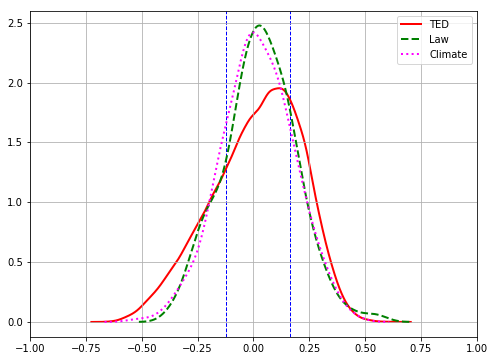

In [20]:
import numpy as np
from scipy import stats
import statsmodels.api as sm
import matplotlib.pyplot as plt
from statsmodels.distributions.mixture_rvs import mixture_rvs

law = np.array(ref_law)
climate = np.array(ref_climate)
buddhism = np.array(ref_buddhism)
catechism = np.array(ref_catechism)
ted = np.array(ref_ted)

kde_ted = sm.nonparametric.KDEUnivariate(ted)
kde_ted.fit() 

kde_law = sm.nonparametric.KDEUnivariate(law)
kde_law.fit() 

# kde_catechism = sm.nonparametric.KDEUnivariate(catechism)
# kde_catechism.fit() 

kde_climate = sm.nonparametric.KDEUnivariate(climate)
kde_climate.fit() 

# kde_buddhism = sm.nonparametric.KDEUnivariate(ref_buddhism)
# kde_buddhism.fit() 

fig = plt.figure(figsize=(8, 6))
plt.axvline(x=thres_down, lw=1, color='blue', linestyle='--', zorder=1)
plt.axvline(x=thres_up, lw=1, color='blue', linestyle='--', zorder=1)
ax = fig.add_subplot(111)
ax.set_xlim([-1, 1])

# Plot the KDE as fitted using the default arguments
ax.plot(kde_ted.support, kde_ted.density, lw=2, label='TED', zorder=1, color='red')
ax.plot(kde_law.support, kde_law.density, lw=2, label='Law', zorder=10, color='green', linestyle='--')
# ax.plot(kde_catechism.support, kde_catechism.density, lw=2, label='Catechism', zorder=10, color='magenta', linestyle=':')
ax.plot(kde_climate.support, kde_climate.density, lw=2, label='Climate', zorder=20, color='magenta', linestyle=':')
# ax.plot(kde_buddhism.support, kde_buddhism.density, lw=2, label='Buddhism', zorder=15, color='black', linestyle='-.')

ax.legend(loc='best')
ax.grid(True, zorder=-5)
plt.savefig('SIF.eps', format='eps')

In [ ]:
def out_threst(lst_en, lst_vi, ref_arr):
  res_en = []
  res_vi = []
  for i, v in enumerate(ref_arr):
    if v < thres_down or v > thres_up:
      res_en.append(lst_en[i])
      res_vi.append(lst_vi[i])
  print(len(res_en))
  return res_en, res_vi

en_finetune_law, vi_finetune_law = out_threst(en_train_law, vi_train_law, ref_law)
en_finetune_buddhism, vi_finetune_buddhism = out_threst(en_train_buddhism, vi_train_buddhism, ref_buddhism)
en_finetune_climate, vi_finetune_climate = out_threst(en_train_climate, vi_train_climate, ref_climate)
en_finetune_catechism, vi_finetune_catechism = out_threst(en_train_catechism, vi_train_catechism, ref_catechism)

118
193
120
152


In [ ]:
!rm -rf finetune
!mkdir finetune

def save_lst(lst, thres, path):
  with open(path, 'w') as f:
    for i, v in enumerate(lst):
      if i < thres:
        f.write(v)
  f.close()


def Save_by_thresh(lst, filename):
  thresh = [50, 100,150,200,250,300]
  for k in thresh:
    l = len(lst)
    if k <= l:
      save_lst(lst, k, "finetune/"+filename+"_"+str(k))
    else:
      save_lst(lst, l, "finetune/"+filename+"_"+str(l))


def writeFile(lst, path):
  with open(path, 'w') as f:
    for v in lst:
      f.write(v)
  f.close()
  
f_variable = [en_finetune_law, en_finetune_buddhism, en_finetune_climate, en_finetune_catechism, \
                vi_finetune_law, vi_finetune_buddhism, vi_finetune_climate, vi_finetune_catechism ]
f_names = ["en_finetune_law", "en_finetune_buddhism", "en_finetune_climate", "en_finetune_catechism", \
              "vi_finetune_law", "vi_finetune_buddhism", "vi_finetune_climate", "vi_finetune_catechism"]

for i, v in enumerate(f_names):
  Save_by_thresh(f_variable[i], v)


test_variable = [vi_test_law, vi_test_buddhism, vi_test_climate, vi_test_catechism, en_test_law, en_test_buddhism, en_test_climate, en_test_catechism]
test_names = ["test_law.vi", "test_buddhism.vi", "test_climate.vi", "test_catechism.vi", "test_law.en", "test_buddhism.en", "test_climate.en", "test_catechism.en"]

for i, v in enumerate(test_variable):
  writeFile(v, "finetune/"+test_names[i])

!ls -al finetune

total 538
-rw------- 1 root root  9813 Apr 20 05:25 en_finetune_buddhism_100
-rw------- 1 root root 14812 Apr 20 05:25 en_finetune_buddhism_150
-rw------- 1 root root 19723 Apr 20 05:25 en_finetune_buddhism_193
-rw------- 1 root root  5246 Apr 20 05:25 en_finetune_buddhism_50
-rw------- 1 root root 13614 Apr 20 05:25 en_finetune_catechism_100
-rw------- 1 root root 20281 Apr 20 05:25 en_finetune_catechism_150
-rw------- 1 root root 20539 Apr 20 05:25 en_finetune_catechism_152
-rw------- 1 root root  7151 Apr 20 05:25 en_finetune_catechism_50
-rw------- 1 root root 13647 Apr 20 05:25 en_finetune_climate_100
-rw------- 1 root root 16493 Apr 20 05:25 en_finetune_climate_120
-rw------- 1 root root  6498 Apr 20 05:25 en_finetune_climate_50
-rw------- 1 root root 16113 Apr 20 05:25 en_finetune_law_100
-rw------- 1 root root 18060 Apr 20 05:25 en_finetune_law_118
-rw------- 1 root root  7784 Apr 20 05:25 en_finetune_law_50
-rw------- 1 root root  7711 Apr 20 05:25 test_buddhism.en
-rw------- 

In [ ]:
!rm -rf  result
!mkdir result
file_variable = [vi_test_law, vi_test_buddhism, vi_test_catechism, vi_test_climate, en_test_law, en_test_buddhism, en_test_climate, en_test_catechism,\
                en_train_law, vi_train_law, en_train_buddhism, vi_train_buddhism, en_train_climate, vi_train_climate, en_train_catechism, vi_train_catechism
                ]
file_names = ["test_law.vi", "test_buddhism.vi", "test_catechism.vi", "test_climate.vi", "test_law.en", "test_buddhism.en", "test_climate.en", "test_catechism.en", \
              "train_law.en", "train_law.vi", "train_buddhism.en", "train_buddhism.vi", "train_climate.en", "train_climate.vi","train_catechism.en", "train_catechism.vi"
              ]
for i, v in enumerate(file_variable):
  writeFile(v, "result/"+file_names[i])

!ls -al result

total 472
-rw------- 1 root root  7711 Apr 20 05:25 test_buddhism.en
-rw------- 1 root root 11275 Apr 20 05:25 test_buddhism.vi
-rw------- 1 root root  9983 Apr 20 05:25 test_catechism.en
-rw------- 1 root root 14226 Apr 20 05:25 test_catechism.vi
-rw------- 1 root root 11880 Apr 20 05:25 test_climate.en
-rw------- 1 root root 15534 Apr 20 05:25 test_climate.vi
-rw------- 1 root root 11306 Apr 20 05:25 test_law.en
-rw------- 1 root root 13801 Apr 20 05:25 test_law.vi
-rw------- 1 root root 32431 Apr 20 05:25 train_buddhism.en
-rw------- 1 root root 47077 Apr 20 05:25 train_buddhism.vi
-rw------- 1 root root 42236 Apr 20 05:25 train_catechism.en
-rw------- 1 root root 57890 Apr 20 05:25 train_catechism.vi
-rw------- 1 root root 43511 Apr 20 05:25 train_climate.en
-rw------- 1 root root 57317 Apr 20 05:25 train_climate.vi
-rw------- 1 root root 46165 Apr 20 05:25 train_law.en
-rw------- 1 root root 56502 Apr 20 05:25 train_law.vi


In [ ]:
!rm EnSIF.tar.gz
!tar -zcf EnSIF.tar.gz result

rm: cannot remove 'EnSIF.tar.gz': No such file or directory


In [ ]:
# !rm -rf EnSIF.tar.gz
# !rm -rf finetune
# !rm -rf result

In [ ]:
!rm SIF-finetune.tar.gz
!tar -zcf SIF-finetune.tar.gz finetune

rm: cannot remove 'SIF-finetune.tar.gz': No such file or directory


In [ ]:
!ls -al

total 859635
drwx------ 2 root root      4096 Apr 20 02:42 AraSIF_word_counts
-rw------- 1 root root    910043 Apr 20 05:21 buddhism.tar.gz
-rw------- 1 root root     93632 Apr 20 05:21 catechism.tar.gz
drwx------ 2 root root      4096 Apr 20 02:42 cleaned_wikidata
-rw------- 1 root root      1643 Apr 20 02:42 clean_extracted_data.py
-rw------- 1 root root     41580 Apr 20 05:21 climate.tar.gz
-rw------- 1 root root      1768 Apr 20 02:42 convert_word2vecmodel2glove_model.py
drwx------ 2 root root      4096 Apr 20 05:17 data_bin
drwx------ 2 root root      4096 Apr 20 05:21 data_bin_buddhism
drwx------ 2 root root      4096 Apr 20 05:21 data_bin_catechism
drwx------ 2 root root      4096 Apr 20 05:21 data_bin_climate
drwx------ 2 root root      4096 Apr 20 05:21 data_bin_law
-rw------- 1 root root    161636 Apr 20 05:25 EnSIF.tar.gz
-rw------- 1 root root   7497739 Apr 20 02:58 en_vi_iwslt.tar.gz
-rw------- 1 root root   7497739 Apr 20 05:17 en_vi_iwslt.tar.gz.1
drwx------ 2 root root 